In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Normal Spleen OT1 Puck_200727_02
# https://datasets.cellxgene.cziscience.com/6a01686c-f4d6-4fa0-b255-da0dcfcd1804.h5ad

adata = sc.read_h5ad('../../data/spleen/6a01686c-f4d6-4fa0-b255-da0dcfcd1804.h5ad')
adata

AnnData object with n_obs × n_vars = 11510 × 20176
    obs: 'n_genes', 'n_UMIs', 'Cell_Type', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'log10_n_UMIs', 'log10_n_genes', 'donor_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene', 'n_beads', 'n_UMIs', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'spatial', 'title'
    obsm: 'spatial'

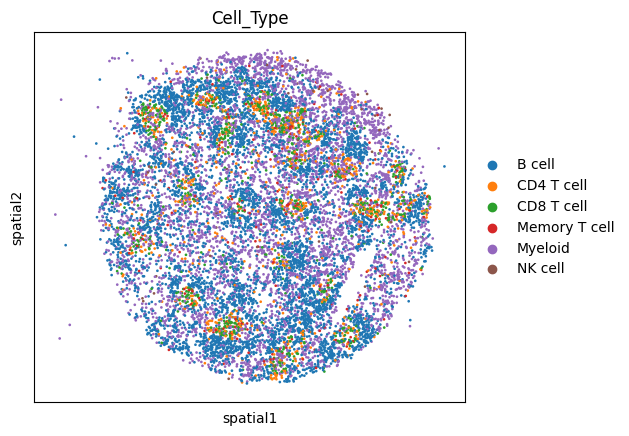

In [4]:
del adata.uns['spatial']
sc.pl.spatial(adata, color='Cell_Type', spot_size=40)

In [5]:
n_top_genes = 3000
min_cells = 10
min_counts = 250

In [6]:
import os 
os.chdir('/ix/djishnu/alw399/SpaceOracle/notebooks')

In [7]:
from utils import get_immune_genes

immune_genes = get_immune_genes(mouse=True)
len(immune_genes)

650

In [ ]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata, min_counts=min_counts)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
adata = adata[:, ~adata.var["mt"]]

sc.pp.filter_genes(adata, min_cells=min_cells)
adata.layers["raw_count"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata, flavor="seurat", n_top_genes=n_top_genes)

sc.pp.highly_variable_genes(
    adata, flavor="seurat", n_top_genes=n_top_genes) 

adata = adata[:, (adata.var.highly_variable | adata.var_names.isin(immune_genes))]
adata.layers["normalized_count"] = adata.to_df().values
adata

In [5]:
# adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data/slideseq_spleen.h5ad')
# adata

In [6]:
adata.obs['Cell_Type'].value_counts()

B cell           3275
Myeloid          2453
CD8 T cell        583
CD4 T cell        480
Memory T cell     100
NK cell             4
Name: Cell_Type, dtype: int64

In [7]:
adata = adata[adata.obs['Cell_Type'].isin(['B cell', 'Myeloid', 'CD8 T cell', 'CD4 T cell', 'Memory T cell'])]
adata

View of AnnData object with n_obs × n_vars = 6891 × 3000
    obs: 'n_genes', 'n_UMIs', 'Cell_Type', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'log10_n_UMIs', 'log10_n_genes', 'donor_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene', 'n_beads', 'n_UMIs', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_lengt

In [9]:
adata.var_names = adata.var['gene']
adata.obs['clusters'] = adata.obs['Cell_Type'].cat.codes
adata.obs['clusters'].value_counts()

0    3275
4    2453
2     583
1     480
3     100
Name: clusters, dtype: int64

In [10]:
adata.write_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data/slideseq_spleen.h5ad')

In [3]:
import scanpy as sc 
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data/slideseq_spleen.h5ad')
adata

AnnData object with n_obs × n_vars = 6891 × 3000
    obs: 'n_genes', 'n_UMIs', 'Cell_Type', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'log10_n_UMIs', 'log10_n_genes', 'donor_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'clusters'
    var: 'gene', 'n_beads', 'n_UMIs', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'fea